## Linear Regression with threshold optimization
Need to add crossvalidation

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

Using TensorFlow backend.


In [2]:
df = utils.get_dataset()

In [3]:
df = preprocessing.encode_education(df)
df = preprocessing.one_hot_encoding(df,columns = ["Marital_Status"])
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)

In [4]:
df = preprocessing.impute_income_KNN(df)

In [5]:
# get a list of all columns
columns = df.columns.tolist()

In [6]:
# remove target feature Response from the list
columns.remove("Response")

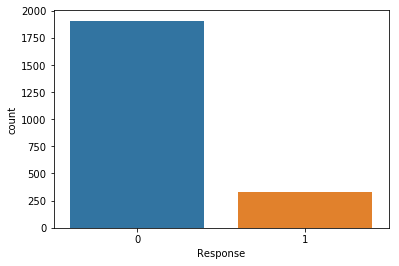

In [7]:
# very imbalanced dataset
countplot(x="Response", data=df)

In [8]:
seed = 0 

In [9]:
# perform the train, test split
X_train, X_test, y_train, y_test = utils.data_split(df, test_size=0.2, random_state=seed)

In [10]:
X_train.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
818,1972,2,65685.0,0,1,92,54,642,14,49,...,0,0,0,0,0,1,0,0,0,0
1281,1971,1,49118.0,0,0,680,90,620,54,239,...,1,0,0,0,1,0,0,0,0,0
1766,1980,4,36802.0,1,0,13,23,16,1,2,...,0,0,0,0,0,0,1,0,0,0
1577,1947,4,81574.0,0,0,62,89,1252,0,465,...,0,0,0,0,0,0,0,1,0,0
924,1986,2,83033.0,1,0,42,82,812,99,431,...,0,0,0,0,0,0,0,1,0,0


In [305]:
from sklearn.linear_model import OrthogonalMatchingPursuit
model = OrthogonalMatchingPursuit(n_nonzero_coefs=14)

In [306]:
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)


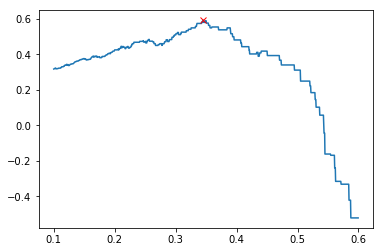

In [307]:
threshold = utils.max_threshold(y_predicted, y_test, threshold_range = (0.1, 0.6),iterations=1000, visualization=True)

In [308]:
y_pred = utils.predict_with_threshold(y_predicted,threshold)
print("Profit:", utils.profit_share(y_pred, y_test))

Profit: 0.593
